#Assignment2

##Q1

In [1]:
import pandas as pd

DATA_PATH = "usina_with_outliers.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("Columns:")
print(df.columns.tolist())
display(df.head())


Shape: (9568, 5)
Columns:
['AT', 'V', 'AP', 'RH', 'PE']


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


###Q1.1

###Q1.2

In [2]:
import statsmodels.api as sm
import numpy as np

# Separate features and target
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# Add constant for OLS
X_const = sm.add_constant(X)

# Fit OLS model
ols_model = sm.OLS(y, X_const).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     4416.
Date:                Fri, 30 Jan 2026   Prob (F-statistic):               0.00
Time:                        04:02:05   Log-Likelihood:                -36621.
No. Observations:                9568   AIC:                         7.325e+04
Df Residuals:                    9563   BIC:                         7.329e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.7845     19.524      2.447      0.0

In [3]:
# Influence measures
influence = ols_model.get_influence()

# Cook's distance
cooks_d, _ = influence.cooks_distance

print("Cook's distance calculated.")


Cook's distance calculated.


In [4]:
# Threshold for Cook's Distance
n = len(df)
threshold = 4 / n

outlier_indices = np.where(cooks_d > threshold)[0]

print("Number of outliers detected:", len(outlier_indices))


Number of outliers detected: 120


In [5]:
# Remove outliers
df_clean = df.drop(index=outlier_indices)

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)


Original shape: (9568, 5)
Cleaned shape: (9448, 5)


In [6]:
df_clean.to_csv("usina.csv", index=False)
print("Clean dataset saved as usina.csv")


Clean dataset saved as usina.csv


##Q2

###Q2.1

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Load dataset
df_outliers = pd.read_csv("usina_with_outliers.csv")

# Features and target
features = ["AT", "V", "AP", "RH"]
target = "PE"

Xo = df_outliers[features]
yo = df_outliers[target]

# Train / test split (70 / 30)
Xo_train, Xo_test, yo_train, yo_test = train_test_split(
    Xo, yo, test_size=0.3, random_state=42
)

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train R2":  r2_score(y_train, y_train_pred),
        "Test MSE":  mean_squared_error(y_test, y_test_pred),
        "Test MAE":  mean_absolute_error(y_test, y_test_pred),
        "Test R2":   r2_score(y_test, y_test_pred),
    }

# Train models
models = {
    "Linear": LinearRegression(),
    "Ridge":  Ridge(alpha=1.0),
    "Lasso":  Lasso(alpha=0.1, max_iter=10000)
}

results_q21 = []

for name, model in models.items():
    metrics = evaluate_model(model, Xo_train, Xo_test, yo_train, yo_test)
    metrics["Dataset"] = "With Outliers"
    metrics["Model"] = name
    results_q21.append(metrics)

df_q21 = pd.DataFrame(results_q21)
display(df_q21)

,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2,Dataset,Model
0,123.384207,5.198679,0.650171,125.113389,5.052458,0.642574,With Outliers,Linear
1,123.384207,5.198685,0.650171,125.113421,5.052463,0.642574,With Outliers,Ridge
2,123.384607,5.201739,0.650169,125.134495,5.055348,0.642514,With Outliers,Lasso


###Q2.2

In [14]:
# Load cleaned dataset
df_clean = pd.read_csv("usina.csv")

Xc = df_clean[features]
yc = df_clean[target]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.3, random_state=42
)

results_q22 = []

for name, model in models.items():
    metrics = evaluate_model(model, Xc_train, Xc_test, yc_train, yc_test)
    metrics["Dataset"] = "Without Outliers"
    metrics["Model"] = name
    results_q22.append(metrics)

df_q22 = pd.DataFrame(results_q22)
display(df_q22)

,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2,Dataset,Model
0,19.864671,3.596396,0.931369,20.396772,3.624773,0.930302,Without Outliers,Linear
1,19.864671,3.596400,0.931369,20.396750,3.624774,0.930302,Without Outliers,Ridge
2,19.865263,3.596855,0.931367,20.392600,3.624890,0.930316,Without Outliers,Lasso


###Q2.3

In [15]:
df_q23 = pd.concat([df_q21, df_q22], ignore_index=True)

df_q23 = df_q23[
    ["Dataset", "Model",
     "Train MSE", "Train MAE", "Train R2",
     "Test MSE", "Test MAE", "Test R2"]
]

display(df_q23)

,Dataset,Model,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
0,With Outliers,Linear,123.384207,5.198679,0.650171,125.113389,5.052458,0.642574
1,With Outliers,Ridge,123.384207,5.198685,0.650171,125.113421,5.052463,0.642574
2,With Outliers,Lasso,123.384607,5.201739,0.650169,125.134495,5.055348,0.642514
3,Without Outliers,Linear,19.864671,3.596396,0.931369,20.396772,3.624773,0.930302
4,Without Outliers,Ridge,19.864671,3.596400,0.931369,20.396750,3.624774,0.930302
5,Without Outliers,Lasso,19.865263,3.596855,0.931367,20.392600,3.624890,0.930316


###Q2.4

In [16]:
lambdas = [0.01, 0.1, 1, 10, 100]
results_q24 = []

for dataset_name, X_train, X_test, y_train, y_test in [
    ("With Outliers", Xo_train, Xo_test, yo_train, yo_test),
    ("Without Outliers", Xc_train, Xc_test, yc_train, yc_test),
]:
    for lam in lambdas:
        # Ridge
        ridge = Ridge(alpha=lam)
        metrics = evaluate_model(ridge, X_train, X_test, y_train, y_test)
        metrics["Dataset"] = dataset_name
        metrics["Model"] = f"Ridge (λ={lam})"
        results_q24.append(metrics)

        # Lasso
        lasso = Lasso(alpha=lam, max_iter=10000)
        metrics = evaluate_model(lasso, X_train, X_test, y_train, y_test)
        metrics["Dataset"] = dataset_name
        metrics["Model"] = f"Lasso (λ={lam})"
        results_q24.append(metrics)

df_q24 = pd.DataFrame(results_q24)
display(df_q24)


,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2,Dataset,Model
0,123.384207,5.198679,0.650171,125.113389,5.052458,0.642574,With Outliers,Ridge (λ=0.01)
1,123.384210,5.198858,0.650171,125.115332,5.052626,0.642568,With Outliers,Lasso (λ=0.01)
2,123.384207,5.198680,0.650171,125.113392,5.052459,0.642574,With Outliers,Ridge (λ=0.1)
3,123.384607,5.201739,0.650169,125.134495,5.055348,0.642514,With Outliers,Lasso (λ=0.1)
4,123.384207,5.198685,0.650171,125.113421,5.052463,0.642574,With Outliers,Ridge (λ=1)
5,123.421151,5.229507,0.650066,125.338356,5.083092,0.641931,With Outliers,Lasso (λ=1)
6,123.384207,5.198737,0.650171,125.113705,5.052513,0.642573,With Outliers,Ridge (λ=10)
7,126.141514,5.540418,0.642353,128.902136,5.408803,0.631750,With Outliers,Lasso (λ=10)
8,123.384213,5.199261,0.650171,125.116548,5.053003,0.642565,With Outliers,Ridge (λ=100)
9,234.655937,11.285489,0.334683,233.064336,11.258653,0.334178,With Outliers,Lasso (λ=100)


## Discussion

From the results, outliers have a significant impact on both training and testing performance. When outliers are present, all models achieve relatively low performance, with test R2 values around 0.64 and test MSE around 125. After removing outliers, training and testing errors both decrease substantially: test MSE drops to around 20 and test R2 increases to approximately 0.93. This indicates that outliers increase overall prediction error and degrade model performance on both the training and test sets.

Comparing the two datasets, the dataset without outliers clearly shows better generalization. In the cleaned dataset, the gap between training and test performance is very small, suggesting that the models generalize well to unseen data. In contrast, when outliers are included, both training and test errors remain high, and the models fail to capture the underlying relationship effectively. This demonstrates that removing influential outliers leads to a more stable and generalizable model.

Ridge and Lasso regression do not appear to provide a significant improvement over standard linear regression in this setting. Across a wide range of lambda values, Ridge regression produces nearly identical train and test metrics compared to linear regression. Lasso regression behaves similarly for small lambda, but its performance degrades for large lambda, especially when outliers are present or when important features are overly penalized. Overall, these results suggest that data quality (outlier removal) has a much larger effect on model performance than regularization for this low-dimensional dataset.


##Q3

###Q3.1

### Model and Library Selection for Coefficient Reliability

For the coefficient reliability analysis, I chose **Linear Regression** as the model and **Statsmodels OLS** as the library.

### Why did you choose Linear Regression (instead of Ridge or Lasso)?
Linear regression is the most appropriate choice for coefficient reliability analysis because it provides unbiased coefficient estimates and supports direct statistical inference. Ridge and Lasso regression introduce regularization penalties that intentionally bias coefficient estimates in order to reduce variance or perform feature selection. While regularization can be helpful for improving prediction performance, it alters the magnitude and variability of coefficients, which makes it less suitable for evaluating coefficient reliability. Since the goal of this task is to assess how stable and trustworthy each coefficient is, linear regression is the most appropriate model.

### Why did you choose Statsmodels OLS (instead of scikit-learn)?
Statsmodels OLS was chosen because it directly provides statistical measures required for coefficient reliability analysis, including standard errors, t-statistics, and p-values. These quantities are essential for evaluating the uncertainty and significance of each coefficient. In contrast, scikit-learn is primarily designed for predictive modeling and does not natively report standard errors or hypothesis testing results. Therefore, Statsmodels OLS is better suited for statistical interpretation and inference in this task.

### Would you scale the independent variables (IVs) and/or the dependent variable (DV)?
No scaling was applied to either the independent variables or the dependent variable.

### Justification for not scaling
Scaling is not necessary for coefficient reliability analysis because statistical significance in ordinary least squares regression is evaluated using t-statistics, which are scale-invariant. Both the coefficient and its standard error scale proportionally, so scaling does not affect the t-statistic or p-value. Additionally, keeping variables in their original units preserves interpretability, allowing the coefficients to be directly understood in terms of real-world quantities. Scaling would therefore reduce interpretability without providing additional benefits for assessing coefficient reliability.


###Q3.2

In [17]:
import pandas as pd
import statsmodels.api as sm

# Load cleaned dataset
df = pd.read_csv("usina.csv")

features = ["AT", "V", "AP", "RH"]
target = "PE"

X = df[features]
y = df[target]

# Add intercept
X_const = sm.add_constant(X)

ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.188e+04
Date:                Fri, 30 Jan 2026   Prob (F-statistic):               0.00
Time:                        04:14:11   Log-Likelihood:                -27563.
No. Observations:                9448   AIC:                         5.514e+04
Df Residuals:                    9443   BIC:                         5.517e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        440.9993      9.743     45.265      0.0

### Q3.2 Coefficient Reliability Analysis

Based on the OLS regression results, the most reliable coefficient is **AT (Ambient Temperature)**. This variable has the largest absolute t-statistic (|t| = 129.113) and a p-value effectively equal to zero, indicating extremely strong statistical significance. In addition, its standard error is very small relative to the magnitude of the coefficient, and the 95% confidence interval is narrow. These factors together suggest that the estimated effect of ambient temperature on power output is highly stable and reliable.

In contrast, the least reliable coefficient is **AP (Ambient Pressure)**. Although it is still statistically significant, it has the smallest absolute t-statistic (|t| = 7.895) among all predictors and a comparatively larger standard error relative to its coefficient magnitude. This indicates greater uncertainty in the estimated effect of ambient pressure compared to the other variables. Therefore, AP is considered the least reliable coefficient in this model.



##Q4

###Q4.1

### Q4.1 Model and Feature Scaling Choice

For the feature importance analysis, **Linear Regression** was used as the model with the **scikit-learn** library.

#### Model choice
Linear regression is well suited for feature importance analysis because the magnitude of its coefficients directly reflects the strength of each feature’s contribution to the model’s predictions. Unlike regularized models, standard linear regression preserves the full effect size of each feature, making it easier to compare their relative importance once the inputs are properly scaled.

#### Library choice
The scikit-learn library was chosen because it provides a straightforward and efficient implementation of linear regression and integrates seamlessly with preprocessing tools such as feature scaling. Since this task focuses on predictive contribution rather than statistical inference, scikit-learn is an appropriate choice.

### Feature scaling
The independent variables were standardized prior to model training, while the dependent variable was left unscaled.

#### Justification for scaling
Feature scaling is necessary for feature importance analysis because the original weather variables are measured in different units and ranges. Standardizing the independent variables places them on a common scale, allowing the magnitudes of the regression coefficients to be directly compared. Without scaling, coefficient magnitudes would be influenced by units rather than true predictive contribution, leading to misleading importance rankings. The dependent variable was not scaled because scaling it does not affect the relative importance of the input features.


###Q4.2

In [18]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("usina.csv")

features = ["AT", "V", "AP", "RH"]
target = "PE"

X = df[features]
y = df[target]

# Scale only the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LinearRegression()
lr.fit(X_scaled, y)

# Get coefficients
coef = lr.coef_

feature_importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef,
    "Abs Coefficient": np.abs(coef)
}).sort_values(by="Abs Coefficient", ascending=False)

display(feature_importance)


,Feature,Coefficient,Abs Coefficient
0,AT,-14.556614,14.556614
1,V,-3.030737,3.030737
3,RH,-2.197120,2.197120
2,AP,0.442513,0.442513


### Q4.2 Feature Importance Analysis

To evaluate feature importance, a linear regression model was trained using standardized independent variables so that the magnitude of the coefficients could be directly compared across features. Feature scaling was applied only to the input variables and not the target variable.

Based on the absolute values of the standardized coefficients, **AT (Ambient Temperature)** is by far the most important feature for predicting power output. Its coefficient magnitude is significantly larger than those of the other variables, indicating that changes in ambient temperature have the strongest impact on electricity generation.

The variables **V (Vacuum)** and **RH (Relative Humidity)** have moderate importance, contributing to the prediction but with a smaller effect size compared to temperature. In contrast, **AP (Ambient Pressure)** has the smallest absolute coefficient, suggesting that it plays a relatively minor role in predicting power output.

It is important to note that feature importance focuses on predictive contribution rather than statistical reliability. While this analysis identifies which variables most strongly influence predictions, it complements the coefficient reliability analysis in Q3 by providing a different perspective on the role of each feature.


##Q5

###Q5.1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Load cleaned dataset
df = pd.read_csv("usina.csv")

features = ["AT", "V", "AP", "RH"]
target = "PE"

X = df[features]
y = df[target]

# Scale IVs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###Q5.2

In [20]:
lambdas = np.logspace(-3, 3, 100)  # 10^-3 → 10^3


###Q5.3

In [21]:
ridge_coefs = []

for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)

ridge_coefs = np.array(ridge_coefs)


In [22]:
lasso_coefs = []

for lam in lambdas:
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_scaled, y)
    lasso_coefs.append(lasso.coef_)

lasso_coefs = np.array(lasso_coefs)


###Q5.4

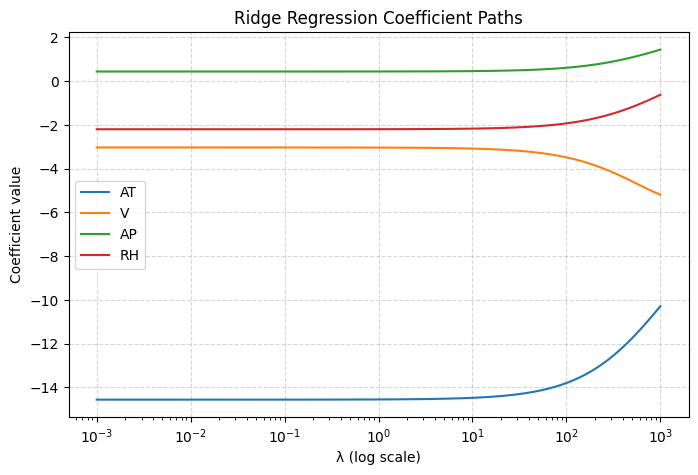

In [23]:
plt.figure(figsize=(8, 5))
for i, feature in enumerate(features):
    plt.plot(lambdas, ridge_coefs[:, i], label=feature)

plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Coefficient value")
plt.title("Ridge Regression Coefficient Paths")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


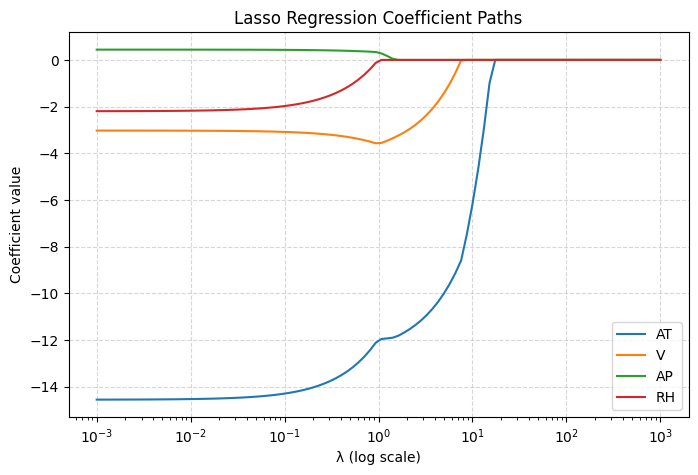

In [24]:
plt.figure(figsize=(8, 5))
for i, feature in enumerate(features):
    plt.plot(lambdas, lasso_coefs[:, i], label=feature)

plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Coefficient value")
plt.title("Lasso Regression Coefficient Paths")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Q5 Discussion: Regularization Paths

The regularization paths illustrate how coefficient values change as the regularization parameter λ increases for Ridge and Lasso regression when using scaled independent variables.

For **Ridge regression**, as λ increases, all coefficients gradually shrink toward zero but none of them become exactly zero. The coefficient paths are smooth and continuous, indicating that Ridge reduces model complexity by penalizing large coefficients while retaining all predictors in the model. This behavior reflects Ridge’s tendency to stabilize coefficient estimates rather than eliminate variables.

In contrast, **Lasso regression** shows a markedly different pattern. As λ increases, several coefficients are driven exactly to zero. In the plot, coefficients such as **AP** and **RH** reach zero relatively early, while others such as **AT** persist longer before eventually shrinking. This demonstrates that Lasso performs implicit feature selection by enforcing sparsity in the model.

Ridge regression is better suited for handling **multicollinearity among independent variables**. When predictors are correlated, Ridge distributes the penalty across correlated features and avoids arbitrarily removing variables, resulting in more stable coefficient estimates. This is evident from the Ridge paths, where all coefficients remain nonzero even under strong regularization.

On the other hand, Lasso regression is more effective for **feature selection**. By driving some coefficients exactly to zero, Lasso produces simpler and more interpretable models. However, this sparsity can be unstable in the presence of multicollinearity, as Lasso may select one predictor while suppressing others that carry similar information.

Overall, the regularization paths highlight the fundamental trade-off between coefficient stability and sparsity. Ridge favors stability and robustness under correlation, while Lasso favors sparsity and feature selection.
